Check that the double Gaussian distribution from David (directly) matches what I copied into snsims. The only differences are in the location of definition of constants, and this is a sanity check to make sure I copied the constant values correctly

In [1]:
import numpy as np

In [2]:
def double_gauss(mu, sigp, sigm, size):
    """Double Gaussian distribution. Note: mu is the mode and not the mean."""
    
    sigm = abs(sigm) # Just in case

    p = np.array([sigp, sigm], dtype=np.float64) # probability of one side is proportional to sigma on that side
    p /= sum(p)


    sig = np.random.choice([sigp, -sigm], size = size, replace = True, p = p)
    
    return abs(np.random.normal(size = size))*sig + mu



def make_SALT2_params(size):
    """Generates "noise"-free mB, x1, c. Trained on JLA SALT2-4 SDSS z < 0.2 and SNLS z < 0.5. Very simple model with linear alpha/beta and same distribution irrspective of host-mass. mB needs h=0.7 distance modulus added to it."""

    color = double_gauss(-0.0474801042369, 0.0965032273527, 0.0428443663595, size = size)
    x1 = double_gauss(0.872727291354, 0.358731835038, 1.42806797468, size = size)
    mass = double_gauss(10.701690617, 0.334359086569, 1.0750402101, size = size)

    mB = -19.0199168813 - 0.0838387899933*(mass > 10.) + 3.20907949118*color - 0.137042055737*x1

    return mB, x1, color, mass

In [3]:
mB_DR, x1_DR, c_DR, m_DR = make_SALT2_params(1000000)

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

/usr/local/miniconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [5]:
from snsims import SALT2_MMDist

In [6]:
mB, x1, c, m = SALT2_MMDist(1000000)

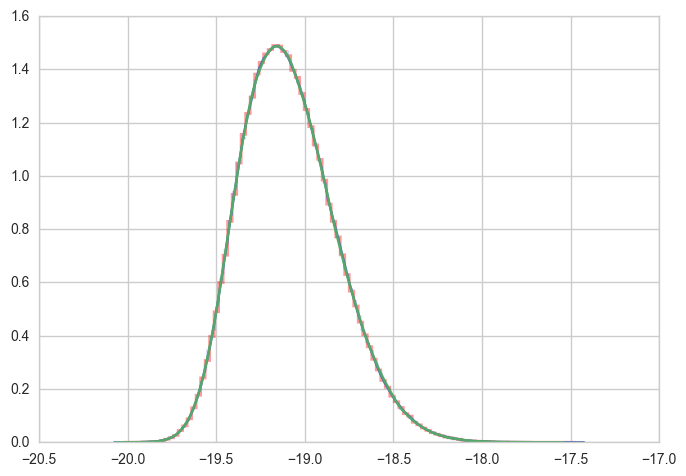

In [7]:
sns.distplot(mB_DR, bins=100, hist_kws=(dict(histtype='step', lw=2, color='r')))
sns.distplot(mB, bins=100, hist_kws=(dict(histtype='step', ls='dashed', color='b')))

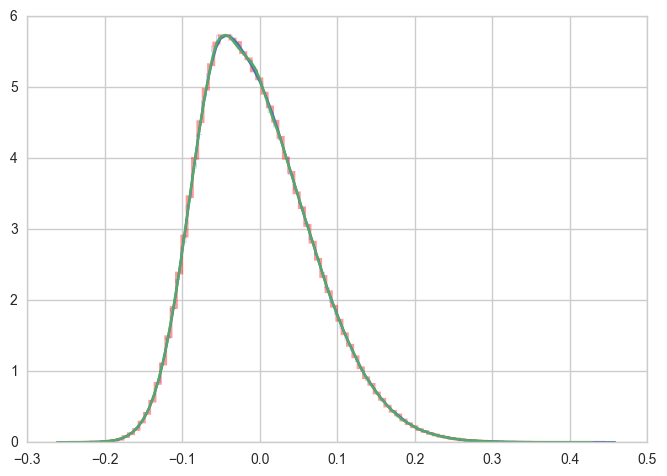

In [8]:
sns.distplot(c_DR, bins=100, hist_kws=(dict(histtype='step', lw=2, color='r')))
sns.distplot(c, bins=100, hist_kws=(dict(histtype='step', ls='dashed', color='b')))

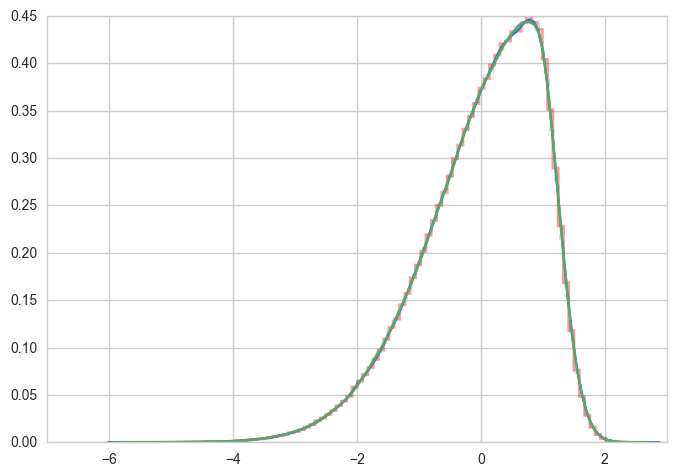

In [9]:
sns.distplot(x1_DR, bins=100, hist_kws=(dict(histtype='step', lw=2, color='r')))
sns.distplot(x1, bins=100, hist_kws=(dict(histtype='step', ls='dashed', color='b')))

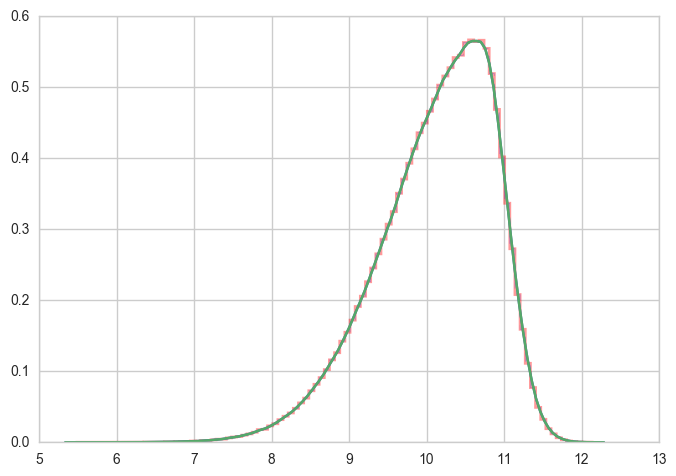

In [10]:
sns.distplot(m, bins=100, hist_kws=(dict(histtype='step', lw=2, color='r')))
sns.distplot(m, bins=100, hist_kws=(dict(histtype='step', ls='dashed', color='b')))